In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from utils.storage.truth_db import SQLiteTruthSaver
from utils.storage.bluesky_db import SQLiteBlueSkySaver

## 0. Extracting Graphs and Subgraphs

In [81]:
#Truth_Graph = SQLiteTruthSaver().extract_network()
#nx.write_gexf(Truth_Graph, "truth.gexf")

# Bluesky_Graph = SQLiteBlueSkySaver().extract_network()
# nx.write_gexf(Bluesky_Graph, "bluesky.gexf")

# Truth_TopGraph = SQLiteTruthSaver().extract_network(top_k=1000)
# nx.write_gexf(Truth_TopGraph, "truth_top1000.gexf")
#
# Bluesky_TopGraph = SQLiteBlueSkySaver().extract_network(top_k=1000)
# nx.write_gexf(Bluesky_TopGraph, "bluesky_top1000.gexf")

Truth_Graph = nx.read_gexf("truth.gexf")
Bluesky_Graph = nx.read_gexf("bluesky.gexf")
Truth_TopGraph = nx.read_gexf("truth_top1000.gexf")
Bluesky_TopGraph = nx.read_gexf("bluesky_top1000.gexf")

## 1. Basic Measures

Order, Size, Degree Distribution and Connected Components

In [93]:
def analyze_graph(G):
    print(f"{G.order()} Nodes and {G.size()} Edges")
    print(f"Density is {nx.density(G)}")

    degree = dict(G.degree())
    in_degree = dict(G.in_degree())
    out_degree = dict(G.out_degree())
    degree_values = list(degree.values())
    in_degree_values = list(in_degree.values())
    out_degree_values = list(out_degree.values())

    count, bins = np.histogram(
        degree_values,
        bins=np.arange(min(degree_values), max(degree_values) + 2)
    )
    pdf = count / G.order()

    # Compute connected component sizes
    cc = list(nx.connected_components(G.to_undirected()))
    component_sizes = sorted([len(c) for c in cc], reverse=True)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Degree Distribution
    axes[0].plot(bins[:-1], pdf, label="Degree Distribution")
    axes[0].set_xscale('log')
    axes[0].set_xlim([1, 15000])
    axes[0].set_xlabel('Grado', size=15, weight='bold')
    axes[0].set_ylabel('% Nodi', size=15, weight='bold')
    axes[0].set_title("Distribuzione dei gradi")
    axes[0].legend()

    # Plot 2: Component Sizes
    axes[1].scatter(component_sizes, range(1, len(component_sizes) + 1), label="Component Sizes")
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_title("Dimensione delle componenti connesse")
    axes[1].legend()

    # Print stats
    print(f"Min Degree: {min(degree_values)}")
    print(f"Max Degree: {max(degree_values)}")
    print(f"Average Degree: {np.mean(degree_values)}")
    print(f"Average In-Degree: {np.mean(in_degree_values)}")
    print(f"Average Out-Degree: {np.mean(out_degree_values)}")
    print(f"There are {len(cc)} Connected Components:")
    for component in cc[:min(3, len(cc))]:
        print(f"\tConnected Component of size: {len(component)}")
    print("\t...")

    top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:3]
    print("Top 3 Nodes by In-Degree:")
    for node, deg in top_in:
        attrs = G.nodes(data=True)[node]
        print(f"\tNode {attrs['username']} {attrs['url']}: In-Degree = {deg}")

    top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:3]
    print("Top 3 Nodes by Out-Degree:")
    for node, deg in top_out:
        attrs = G.nodes(data=True)[node]
        print(f"\tNode {attrs['username']} {attrs['url']}: Out-Degree = {deg}")

    print("Degree Distribution:")
    plt.tight_layout()
    plt.show()


29291 Nodes and 51447 Edges
Density is 5.9966193878991e-05
Min Degree: 1
Max Degree: 13481
Average Degree: 3.512819637431293
Average In-Degree: 1.7564098187156465
Average Out-Degree: 1.7564098187156465
There are 8 Connected Components:
	Connected Component of size: 29275
	Connected Component of size: 2
	Connected Component of size: 2
	...
Top 3 Nodes by In-Degree:
	Node realDonaldTrump https://truthsocial.com/@realDonaldTrump: In-Degree = 13481
	Node joemccuiston https://truthsocial.com/@joemccuiston: In-Degree = 3992
	Node OksanaTrump https://truthsocial.com/@OksanaTrump: In-Degree = 1705
Top 3 Nodes by Out-Degree:
	Node DaKine17 https://truthsocial.com/@DaKine17: Out-Degree = 581
	Node char_smi3 https://truthsocial.com/@char_smi3: Out-Degree = 124
	Node JimHardy https://truthsocial.com/@JimHardy: Out-Degree = 78
Degree Distribution:


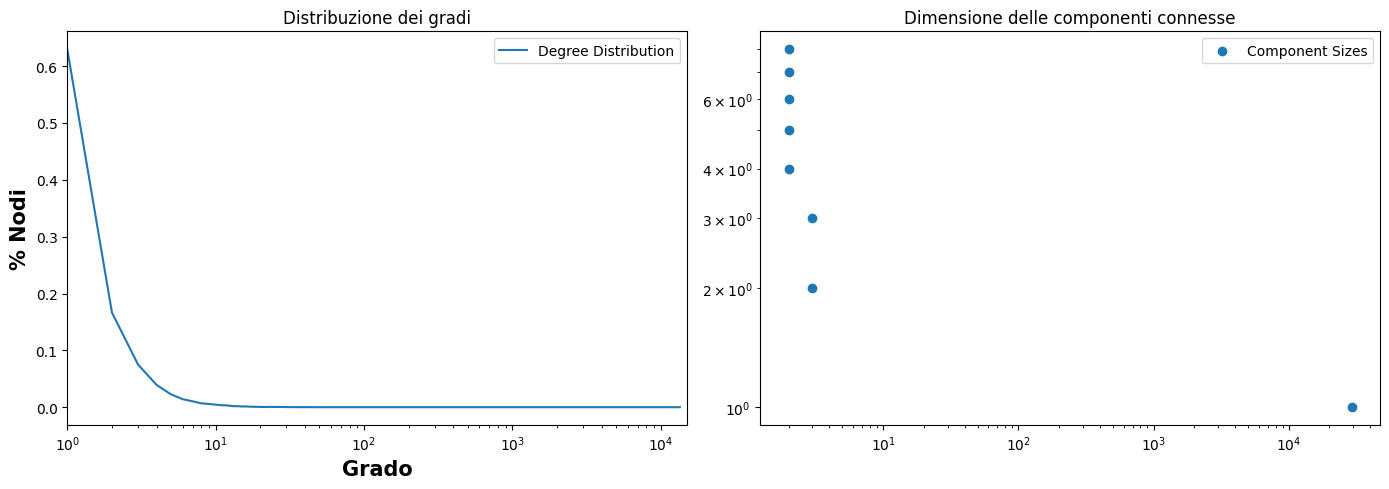

In [94]:
analyze_graph(Truth_Graph)

14735 Nodes and 17607 Edges
Density is 8.109882435492535e-05
Min Degree: 1
Max Degree: 1148
Average Degree: 2.38982015609094
Average In-Degree: 1.19491007804547
Average Out-Degree: 1.19491007804547
There are 240 Connected Components:
	Connected Component of size: 13957
	Connected Component of size: 8
	Connected Component of size: 7
	...
Top 3 Nodes by In-Degree:
	Node atrupar.com https://bsky.app/profile/atrupar.com: In-Degree = 1148
	Node mollyjongfast.bsky.social https://bsky.app/profile/mollyjongfast.bsky.social: In-Degree = 817
	Node artcandee.bsky.social https://bsky.app/profile/artcandee.bsky.social: In-Degree = 778
Top 3 Nodes by Out-Degree:
	Node mccarthypm.bsky.social https://bsky.app/profile/mccarthypm.bsky.social: Out-Degree = 22
	Node robertomitchelli.bsky.social https://bsky.app/profile/robertomitchelli.bsky.social: Out-Degree = 17
	Node nameless62.bsky.social https://bsky.app/profile/nameless62.bsky.social: Out-Degree = 17
Degree Distribution:


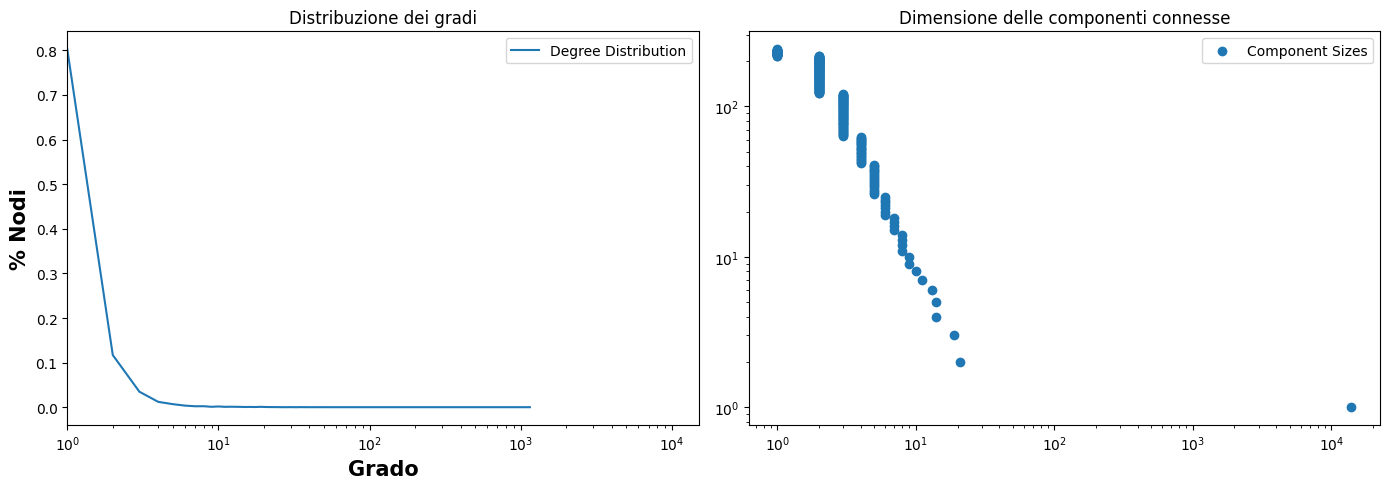

In [95]:
analyze_graph(Bluesky_Graph)

993 Nodes and 4384 Edges
Density is 0.004450508397492122
Min Degree: 1
Max Degree: 641
Average Degree: 8.829808660624371
Average In-Degree: 4.4149043303121855
Average Out-Degree: 4.4149043303121855
There are 2 Connected Components:
	Connected Component of size: 992
	Connected Component of size: 1
	...
Top 3 Nodes by In-Degree:
	Node realDonaldTrump https://truthsocial.com/@realDonaldTrump: In-Degree = 641
	Node joemccuiston https://truthsocial.com/@joemccuiston: In-Degree = 210
	Node IStandWithTrump47 https://truthsocial.com/@IStandWithTrump47: In-Degree = 149
Top 3 Nodes by Out-Degree:
	Node DaKine17 https://truthsocial.com/@DaKine17: Out-Degree = 99
	Node Gscott62 https://truthsocial.com/@Gscott62: Out-Degree = 24
	Node nativecslifornian https://truthsocial.com/@nativecslifornian: Out-Degree = 24
Degree Distribution:


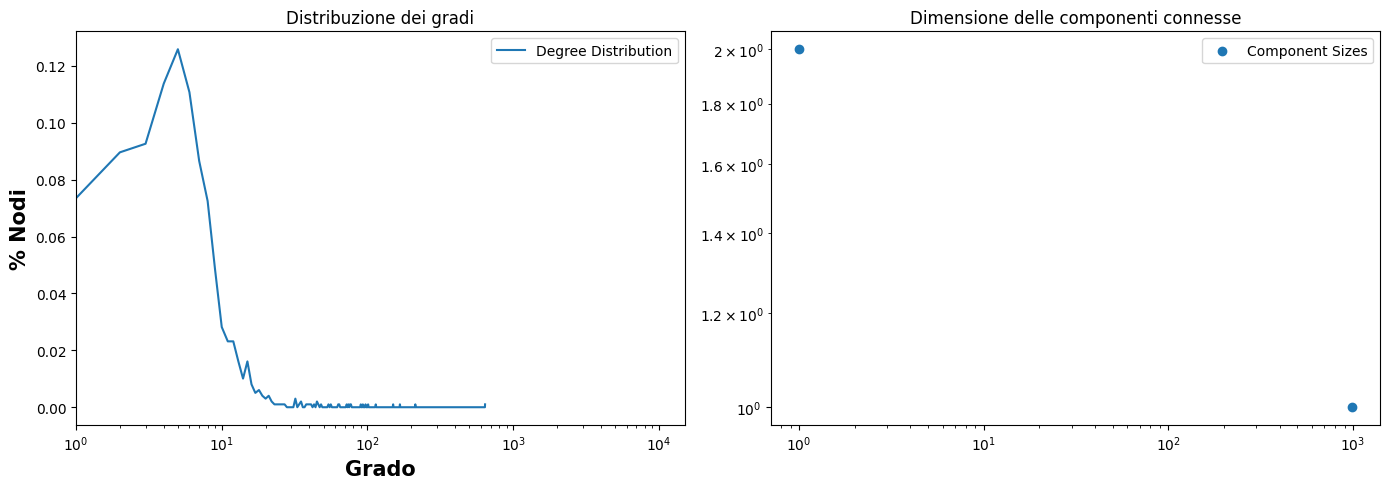

In [96]:
analyze_graph(Truth_TopGraph)

925 Nodes and 1787 Edges
Density is 0.0020907920907920906
Min Degree: 1
Max Degree: 179
Average Degree: 3.863783783783784
Average In-Degree: 1.931891891891892
Average Out-Degree: 1.931891891891892
There are 15 Connected Components:
	Connected Component of size: 910
	Connected Component of size: 1
	Connected Component of size: 1
	...
Top 3 Nodes by In-Degree:
	Node atrupar.com https://bsky.app/profile/atrupar.com: In-Degree = 179
	Node mollyjongfast.bsky.social https://bsky.app/profile/mollyjongfast.bsky.social: In-Degree = 147
	Node artcandee.bsky.social https://bsky.app/profile/artcandee.bsky.social: In-Degree = 129
Top 3 Nodes by Out-Degree:
	Node mccarthypm.bsky.social https://bsky.app/profile/mccarthypm.bsky.social: Out-Degree = 11
	Node nameless62.bsky.social https://bsky.app/profile/nameless62.bsky.social: Out-Degree = 10
	Node robertomitchelli.bsky.social https://bsky.app/profile/robertomitchelli.bsky.social: Out-Degree = 10
Degree Distribution:


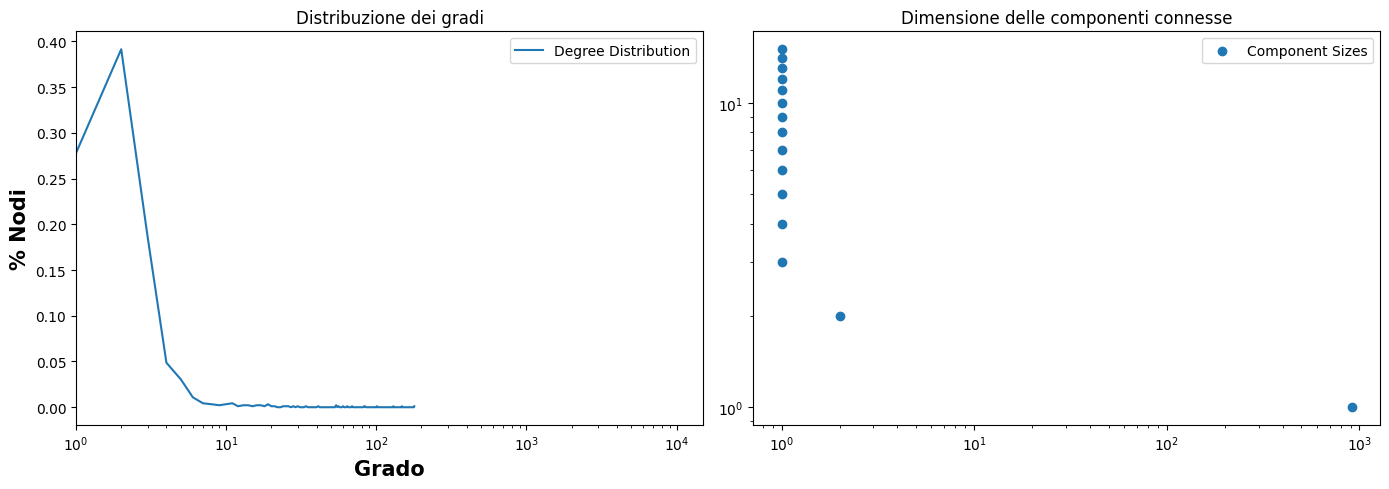

In [97]:
analyze_graph(Bluesky_TopGraph)